**Bài tập Segmentation**

*   Tên: Thái Trần Khánh Nguyên
*   MSSV: 19520188

In [ ]:
from google.colab import drive
import os
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/gdrive')

Mounted at /gdrive


# Segmentation

In [ ]:
dir_monhoc = '/gdrive/MyDrive/CS231.L22.KHCL'
dir_baitap = os.path.join(dir_monhoc, 'ImageSegmentation')

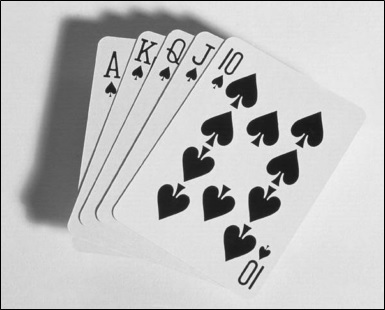

In [ ]:
path_particles = os.path.join(dir_baitap, 'Phandoan01.jpg')
particles = cv.imread(path_particles, 0)
cv2_imshow(particles)

In [ ]:
def avgHist(img):
  % hist = np.histogram(img.flatten(),256,[0,256])
  hist = cv.calcHist([img],[0],None,[256],[0,256])

  plt.figure(figsize=(20,10))
  plt.plot(hist)
  plt.xlim(0, 256)
  plt.show()

  i, j = 0, hist.shape[0]
  while (hist[i] == 0): i += 1
  while (hist[j-1] == 0): j -= 1
  print(i, j)
  return (i + j) / 2

In [ ]:
def Segmentation(img, t):
  tmp = img.copy()

  for i in range(tmp.shape[0]):
    for j in range(tmp.shape[1]):
      if (tmp[i][j] > t):
        tmp[i][j] = 0
      else:
        tmp[i][j] = 255

  return tmp


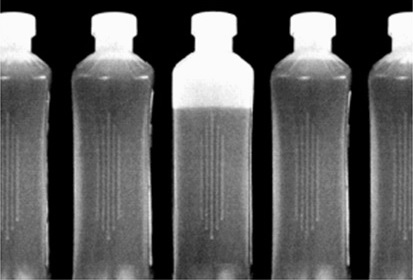

In [ ]:
image_path = os.path.join(dir_baitap, 'Phandoan02.jpg')
image = cv.imread(image_path, 0)
cv2_imshow(image)

In [ ]:
def AdaptiveSeg(f, nrow, ncol):
  g = f.copy()
  r = int(f.shape[0]/nrow)
  c = int(f.shape[1]/ncol)

  for i in range(nrow):
    for j in range(ncol):
      x = g[i*r:(i+1)*r, j*c:(j+1)*c].copy()

      cv2_imshow(x)

      % hist = np.histogram(x.flatten(),256,[0,256])
      hist = cv.calcHist([x],[0],None,[256],[0,256])

      plt.figure(figsize=(10,5))
      plt.plot(hist)
      plt.xlim(0, 256)
      plt.show()
      while (True): 
        t = int(input())
        if (t == 0):
          g[i*r:(i+1)*r, j*c:(j+1)*c] = x
          break
        x = g[i*r:(i+1)*r, j*c:(j+1)*c].copy()
        x = Segmentation(x, t)
        cv2_imshow(x)

  return g


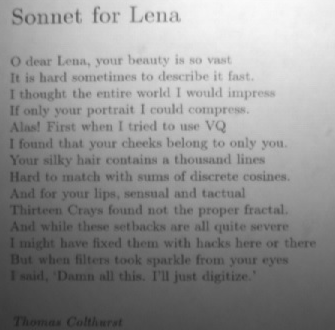

In [ ]:
image_path = os.path.join(dir_baitap, 'son1.jpg')
image = cv.imread(image_path, 0)
#(510, 384)
cv2_imshow(image)

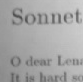

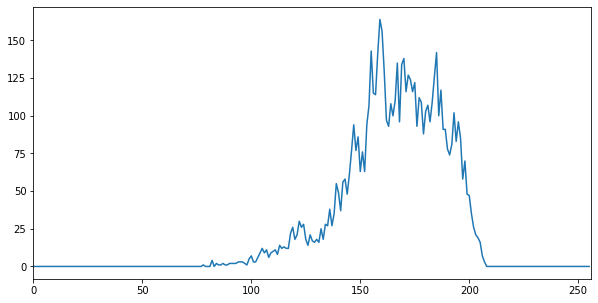

135


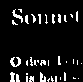

0


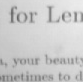

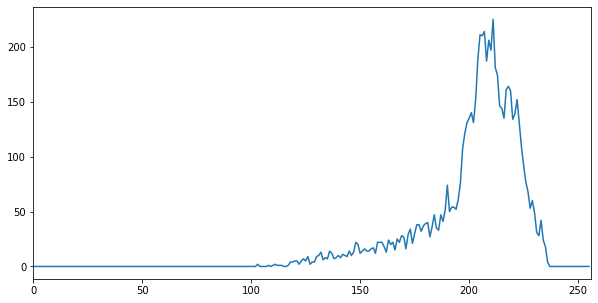

170


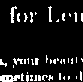

0


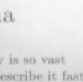

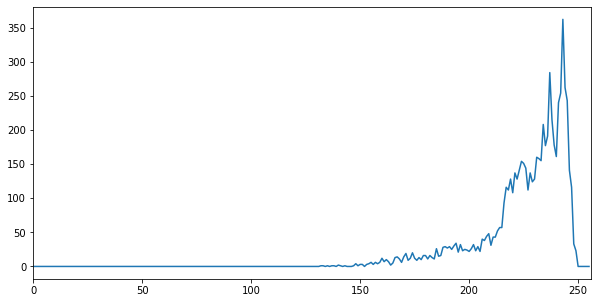

190


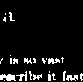

0


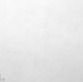

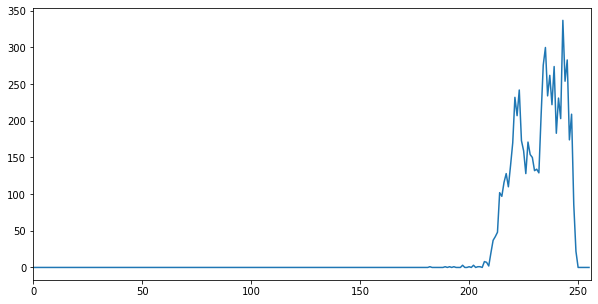

1


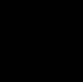

0


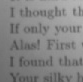

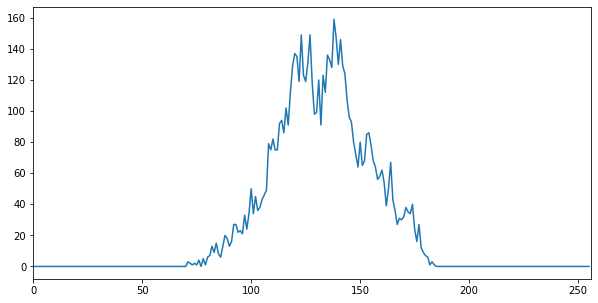

105


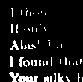

0


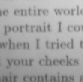

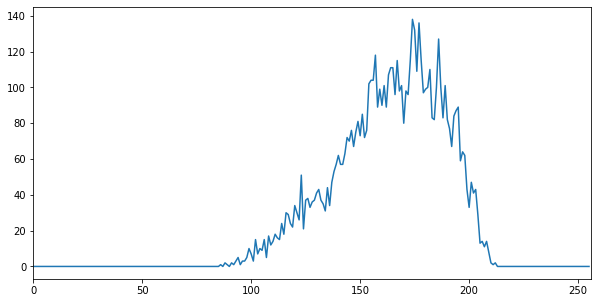

135


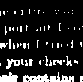

0


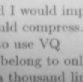

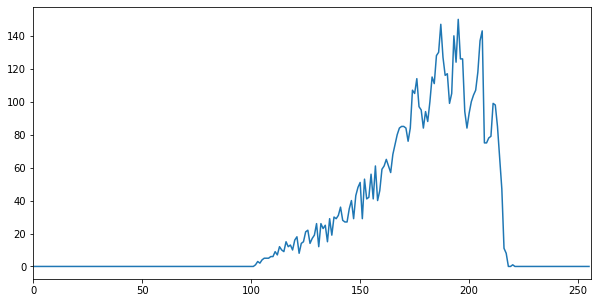

155


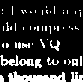

0


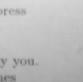

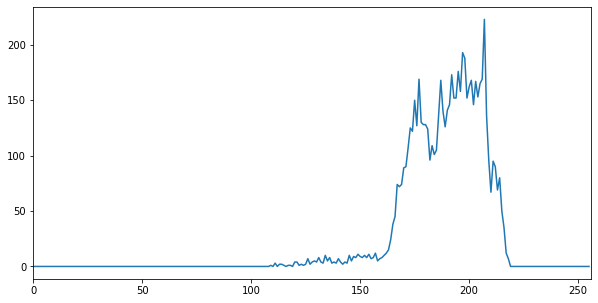

155


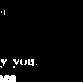

0


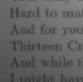

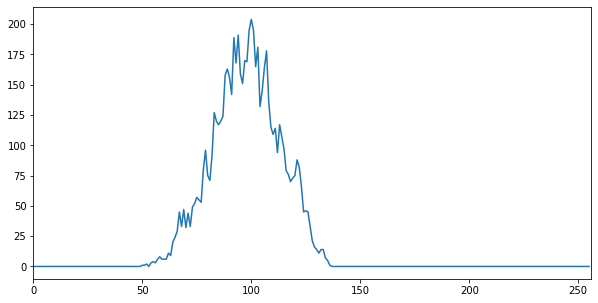

80


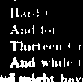

0


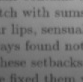

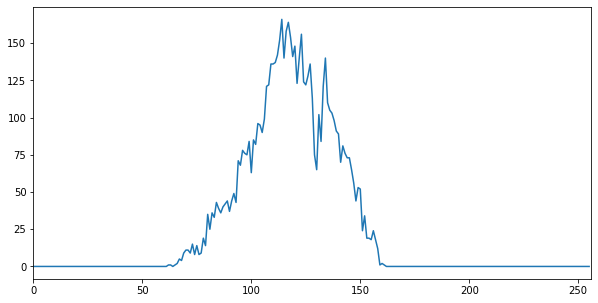

100


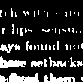

0


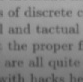

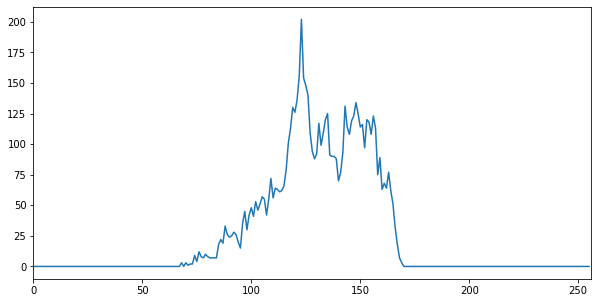

110


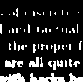

0


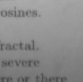

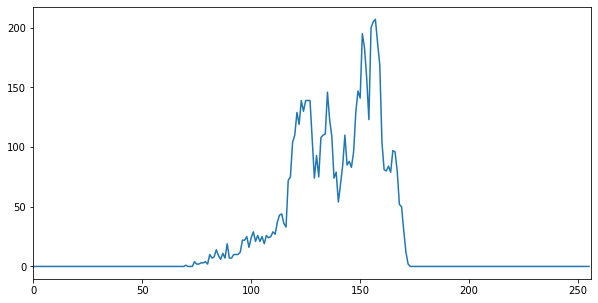

110


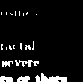

0


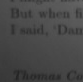

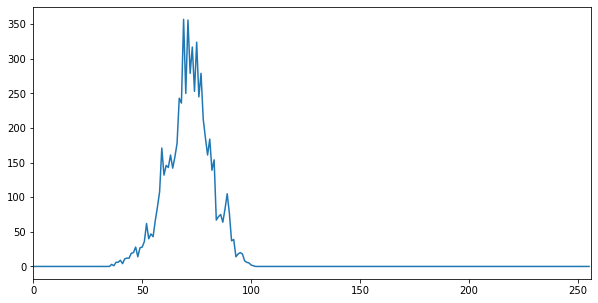

55


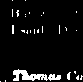

0


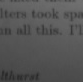

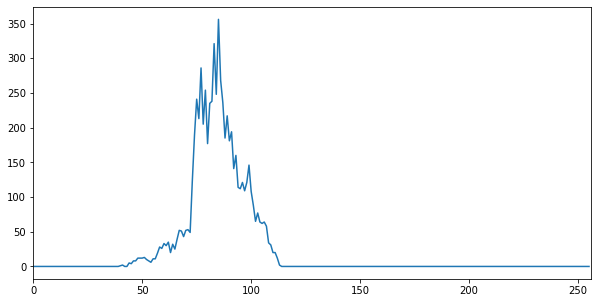

70


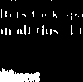

0


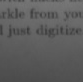

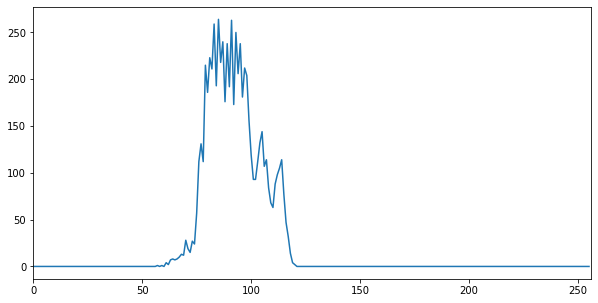

75


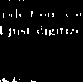

0


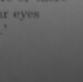

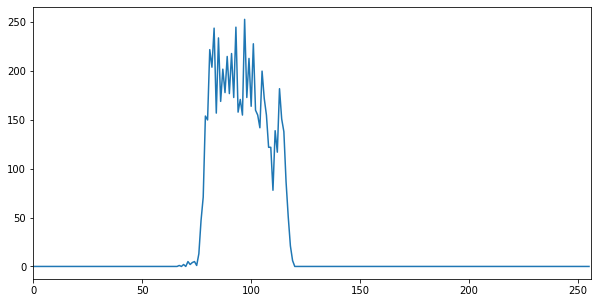

70


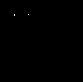

80


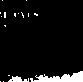

0


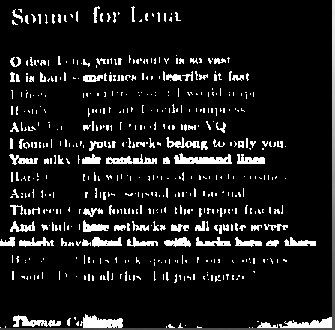

In [ ]:
cv2_imshow(AdaptiveSeg(image[70:400, 35:370], 4, 4))

# K-Means clusters

In [ ]:
from sklearn.cluster import KMeans

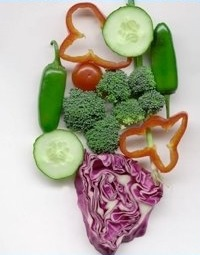

In [ ]:
image_path = os.path.join(dir_baitap, 'vegetables.jpg')
image = cv.imread(image_path)
#(510, 384)
cv2_imshow(image)

In [ ]:
def Kmeans(img, k):
  r = img.shape[0]
  c = img.shape[1]
  g = img.reshape(r*c, 3)

  kmeans = KMeans(n_clusters=k, random_state=0).fit(g)
  t = kmeans.cluster_centers_[kmeans.labels_]

  return t.reshape(r, c, 3)

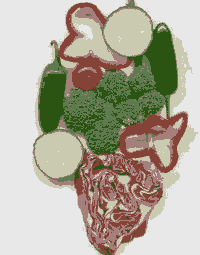

In [ ]:
cv2_imshow(Kmeans(image, 6))

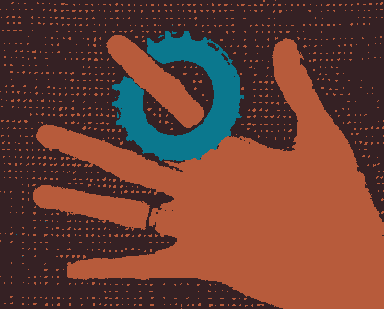

In [ ]:
image_path = os.path.join(dir_baitap, 'hand.jpg')
image = cv.imread(image_path)
#(510, 384)
cv2_imshow(Kmeans(image, 3))

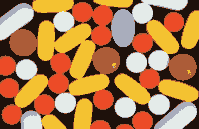

In [ ]:
image_path = os.path.join(dir_baitap, 'thuoc.jpg')
image = cv.imread(image_path)
#(510, 384)
cv2_imshow(Kmeans(image, 6))

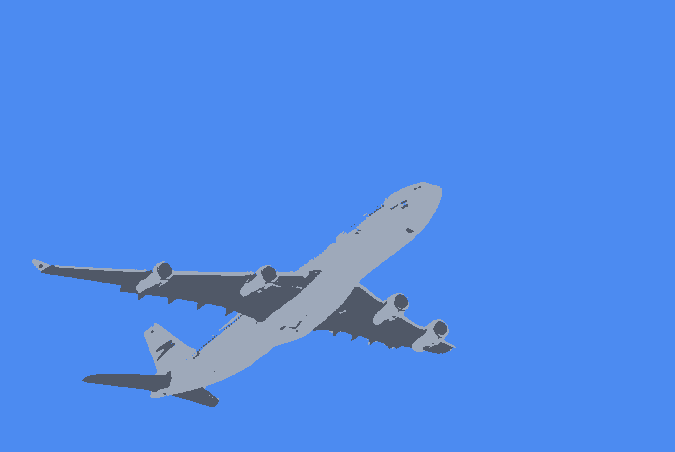

In [ ]:
image_path = os.path.join(dir_baitap, 'airplane.jpg')
image = cv.imread(image_path)
#(510, 384)
cv2_imshow(Kmeans(image, 3))

In [ ]:
def KmeansVer2(img, k):
  r, c, d = img.shape
  g = []

  for i in range(r):
    for j in range(c):
      g.append([img[i][j][0], img[i][j][1], img[i][j][2], i, j])
  kmeans = KMeans(n_clusters=k, random_state=0).fit(g)

  arrcolor = np.random.rand(15, 3)*255
  t = arrcolor[kmeans.labels_]

  img_rst = img.copy()
  i = 0
  for y in range(r):
    for x in range(c):
      img_rst[y][x] = t[i][0:3]
      i = i+1
  return img_rst


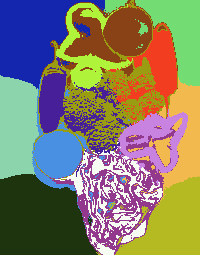

In [ ]:
image_path = os.path.join(dir_baitap, 'vegetables.jpg')
image = cv.imread(image_path)
#(510, 384)
cv2_imshow(KmeansVer2(image, 15))

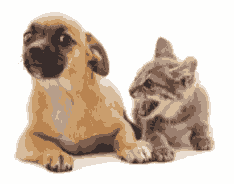

In [ ]:
image_path = os.path.join(dir_baitap, 'dogcat.jpg')
image = cv.imread(image_path)
#(510, 384)
cv2_imshow(Kmeans(image, 10))

# Mean shift

In [ ]:
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

In [ ]:
def Meanshift(img):
  r = img.shape[0]
  c = img.shape[1]
  g = img.reshape(r*c, 3)

  bw = estimate_bandwidth(g, quantile=0.1, n_samples = 500)
  ms = MeanShift(bandwidth=bw, bin_seeding=True).fit(g)
  t = ms.cluster_centers_[ms.labels_]

  return t.reshape(r, c, 3)

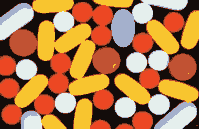

In [ ]:
image_path = os.path.join(dir_baitap, 'thuoc.jpg')
image = cv.imread(image_path)
cv2_imshow(Meanshift(image))

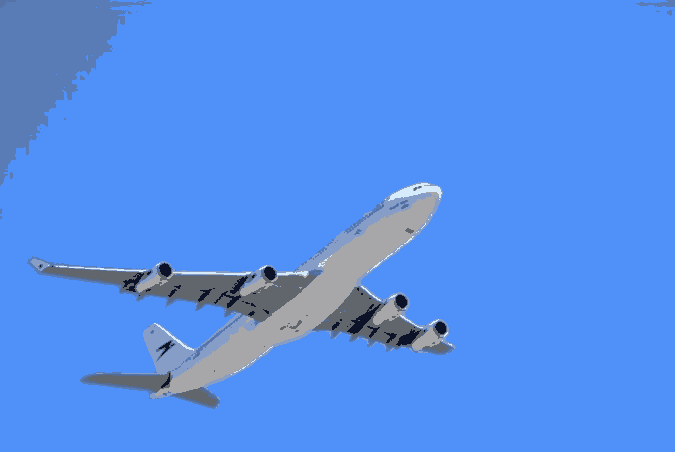

In [ ]:
image_path = os.path.join(dir_baitap, 'airplane.jpg')
image = cv.imread(image_path)
cv2_imshow(Meanshift(image))

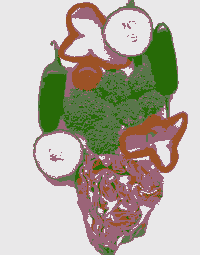

In [ ]:
image_path = os.path.join(dir_baitap, 'vegetables.jpg')
image = cv.imread(image_path)
cv2_imshow(Meanshift(image))